In [8]:
import numpy as np
import cv2 as cv
import glob

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)


# Arrays to store object points and image points from all the images.
imgpoints = [] # 2d points in image plane.

images = glob.glob('pics/pic*.jpg')

print(len(images))

print(images)



19
['pics/pic18.jpg', 'pics/pic6.jpg', 'pics/pic16.jpg', 'pics/pic11.jpg', 'pics/pic2.jpg', 'pics/pic12.jpg', 'pics/pic13.jpg', 'pics/pic8.jpg', 'pics/pic5.jpg', 'pics/pic14.jpg', 'pics/pic17.jpg', 'pics/pic7.jpg', 'pics/pic10.jpg', 'pics/pic1.jpg', 'pics/pic4.jpg', 'pics/pic9.jpg', 'pics/pic15.jpg', 'pics/pic0.jpg', 'pics/pic3.jpg']


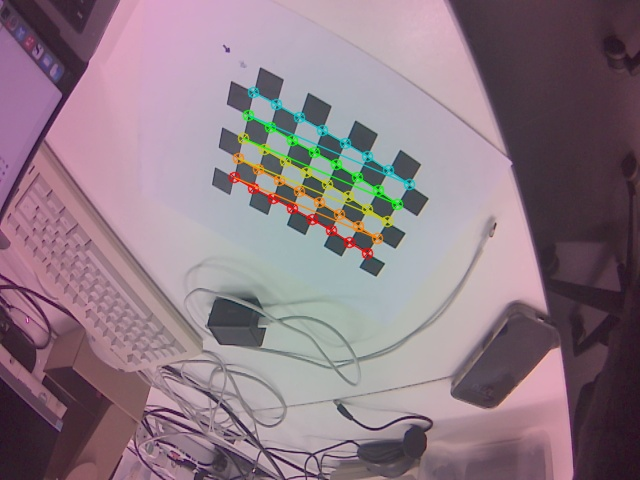

In [9]:
from IPython.display import display, Image
import IPython.display
import os

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (8,5), None)
    
    print(ret)

    # If found, add object points, image points (after refining them)
    if ret == True:
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (8,5), corners2, ret)
        
        
        im_writed = cv.imwrite(f"./pics/cornered_{os.path.basename(fname)}", img)
        if not im_writed:
            print("Error!")
        
        _, img_encoded = cv.imencode('.jpg', img)
        IPython.display.clear_output(wait=True)
        display(Image(data=img_encoded.tobytes()))

In [10]:
cols = 8   # X方向（长轴）
rows = 5   # Y方向（短轴）
square_size = 2.0  # 每个方格大小（单位：任意）

# 生成3D坐标矩阵
objp = np.zeros((rows * cols, 3), np.float32)
objp[:, :2] = np.mgrid[0:cols, 0:rows].T.reshape(-1, 2)
objp *= square_size  # 按方格尺寸缩放

# reverse the objp
objp=objp[::-1]

print(objp)

objpoints = [objp]*len(imgpoints)

# 打印结果
print("cornes coordinates")
print(objpoints[:2])

print(len(objpoints))
print(len(imgpoints))

[[14.  8.  0.]
 [12.  8.  0.]
 [10.  8.  0.]
 [ 8.  8.  0.]
 [ 6.  8.  0.]
 [ 4.  8.  0.]
 [ 2.  8.  0.]
 [ 0.  8.  0.]
 [14.  6.  0.]
 [12.  6.  0.]
 [10.  6.  0.]
 [ 8.  6.  0.]
 [ 6.  6.  0.]
 [ 4.  6.  0.]
 [ 2.  6.  0.]
 [ 0.  6.  0.]
 [14.  4.  0.]
 [12.  4.  0.]
 [10.  4.  0.]
 [ 8.  4.  0.]
 [ 6.  4.  0.]
 [ 4.  4.  0.]
 [ 2.  4.  0.]
 [ 0.  4.  0.]
 [14.  2.  0.]
 [12.  2.  0.]
 [10.  2.  0.]
 [ 8.  2.  0.]
 [ 6.  2.  0.]
 [ 4.  2.  0.]
 [ 2.  2.  0.]
 [ 0.  2.  0.]
 [14.  0.  0.]
 [12.  0.  0.]
 [10.  0.  0.]
 [ 8.  0.  0.]
 [ 6.  0.  0.]
 [ 4.  0.  0.]
 [ 2.  0.  0.]
 [ 0.  0.  0.]]
cornes coordinates
[array([[14.,  8.,  0.],
       [12.,  8.,  0.],
       [10.,  8.,  0.],
       [ 8.,  8.,  0.],
       [ 6.,  8.,  0.],
       [ 4.,  8.,  0.],
       [ 2.,  8.,  0.],
       [ 0.,  8.,  0.],
       [14.,  6.,  0.],
       [12.,  6.,  0.],
       [10.,  6.,  0.],
       [ 8.,  6.,  0.],
       [ 6.,  6.,  0.],
       [ 4.,  6.,  0.],
       [ 2.,  6.,  0.],
       [ 0.,  6.,  

In [11]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print(ret)
print(mtx)

0.31577562095954215
[[402.60350228   0.         263.30000918]
 [  0.         537.76023089 278.24728515]
 [  0.           0.           1.        ]]


In [12]:
print(dist)

[[-0.31085325 -0.11558236  0.00249467 -0.00088277  0.51442531]]


In [14]:
# print(rvecs, tvecs)
img = cv.imread('pics/pic0.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

print(h, w)

480 640


In [15]:
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

True

In [16]:
# get perspective transmatrix
im_idx = 11
print(images[im_idx])

pics/pic7.jpg


In [17]:
selected_impts = imgpoints[im_idx]
print(selected_impts[:4])

[[[282.2112  422.9326 ]]

 [[278.19492 397.20953]]

 [[274.28207 370.20355]]

 [[270.1672  342.32358]]]


In [21]:
src_pts = np.float32([selected_impts[0], selected_impts[7], selected_impts[-1], selected_impts[-8]])
print(src_pts)

[[[282.2112  422.9326 ]]

 [[251.27434 225.43726]]

 [[331.97287 206.90125]]

 [[359.11145 432.85703]]]


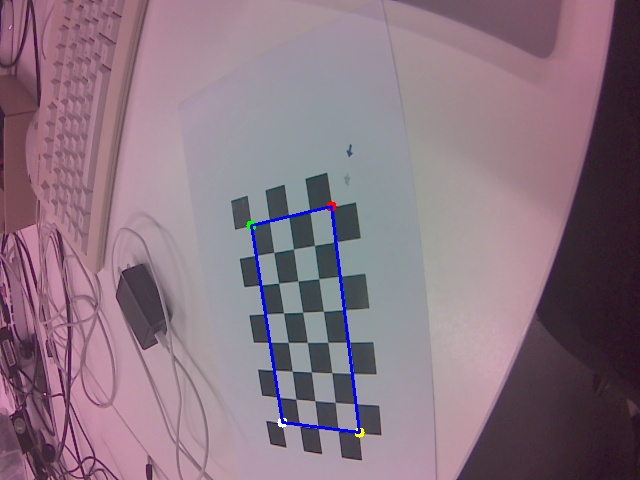

In [22]:
selected_im = cv.imread(images[im_idx])

# convert to int
pts = np.int32(src_pts.reshape(-1, 2))

# draw points
colors = [(255,255,255), (0,255,0), (0,0,255),(0,255,255)]
for i, p in enumerate(pts):
    cv.circle(selected_im, tuple(p), radius=5, color=colors[i], thickness=-1)

# linke lines
cv.polylines(selected_im, [pts], isClosed=True, color=(255, 0, 0), thickness=2)


_, img_encoded = cv.imencode('.jpg', selected_im)
IPython.display.clear_output(wait=True)
display(Image(data=img_encoded.tobytes()))

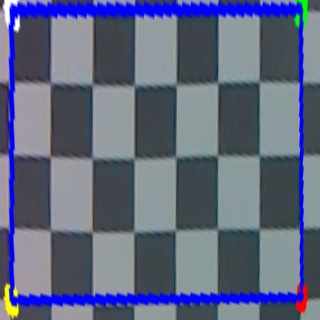

In [23]:
import cv2
# get persepictive and wrap
dst_pts = np.float32([[10, 10], [300, 10], [300, 300], [10, 300]])
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

print(M)

wraped = cv2.warpPerspective(selected_im, M, (320, 320))

_, wraped_jpg = cv.imencode('.jpg', wraped)
IPython.display.clear_output(wait=True)
display(Image(data=wraped_jpg.tobytes()))